In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.cluster import KMeans
 
%matplotlib inline 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure


from pandas.plotting import scatter_matrix
import numpy as np

In [2]:
chess_file_path = './games.csv'

chess_data = pd.read_csv(chess_file_path)

h = pd.read_csv(chess_file_path)
print(h.shape)
print( "\nThe table has {:d} rows and {:d} columns.".format( h.shape[0], h.shape[1]))
print( "\nThe columns are: ")
for i in h.columns: 
    print( "\t", i)
print( "\nThe first few rows are:" )
h.head()

(20058, 16)

The table has 20058 rows and 16 columns.

The columns are: 
	 id
	 rated
	 created_at
	 last_move_at
	 turns
	 victory_status
	 winner
	 increment_code
	 white_id
	 white_rating
	 black_id
	 black_rating
	 moves
	 opening_eco
	 opening_name
	 opening_ply

The first few rows are:


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
h.describe()
h["opening_name"].value_counts()

Van't Kruijs Opening                                              368
Sicilian Defense                                                  358
Sicilian Defense: Bowdler Attack                                  296
Scotch Game                                                       271
French Defense: Knight Variation                                  271
                                                                 ... 
Sicilian Defense: Kupreichik Variation                              1
Modern Defense: Lizard Defense |  Mittenberger Gambit               1
French Defense: Rubinstein Variation |  Kasparov Attack             1
French Defense: Tarrasch Variation |  Open System |  Main Line      1
Sicilian Defense: Najdorf Variation |  Polugaevsky Variation        1
Name: opening_name, Length: 1477, dtype: int64

In [4]:
y = chess_data.turns
chess_features = ['white_rating', 'black_rating']
x = chess_data[chess_features]
x.describe()
x.head()

,white_rating,black_rating
0,1500,1191
1,1322,1261
2,1496,1500
3,1439,1454
4,1523,1469


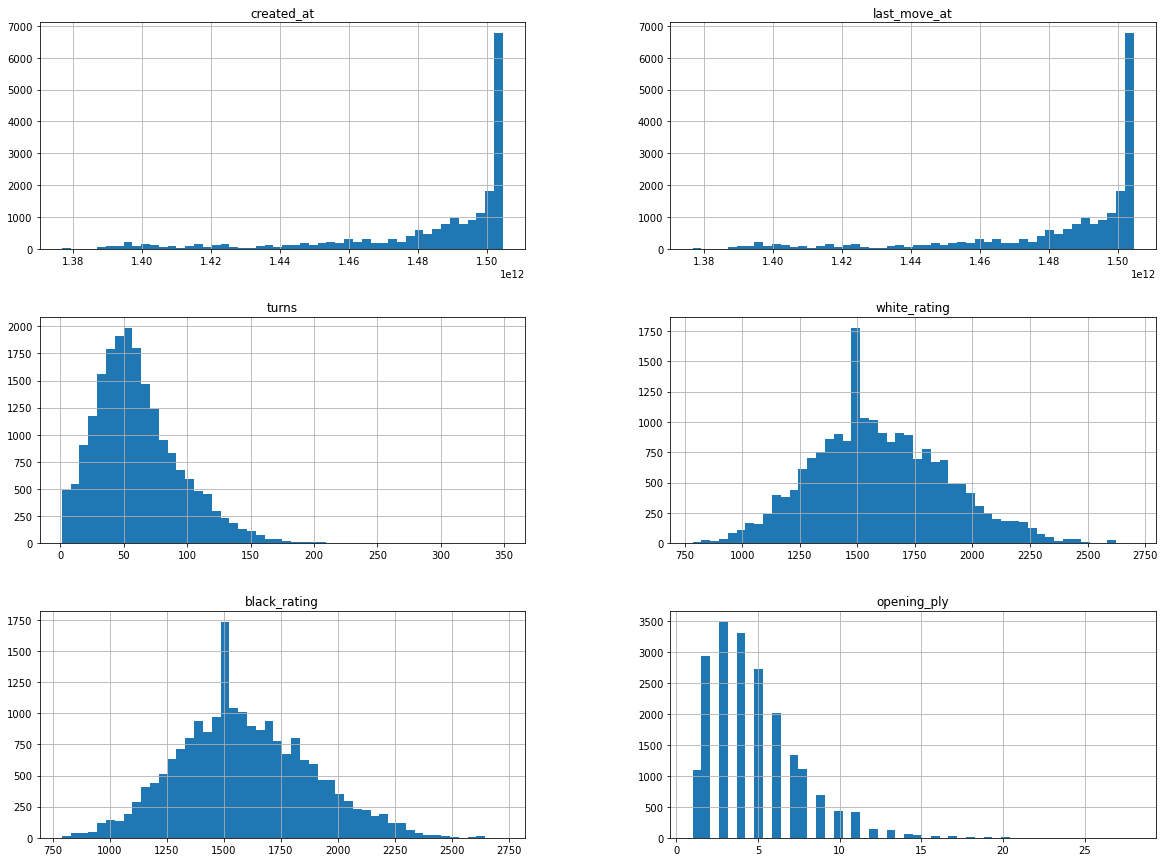

In [5]:
h.hist( bins = 50, figsize = (20,15))
plt.show()

In [6]:
def split_train_test( data, test_ratio):
    # np.random.seed( 42)
    shuffled_indices = np.random.permutation( len( data))
    print( shuffled_indices)
    test_set_size = int(len( data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test( h, 0.2)                                   
# Nice how you can return more than one value from a function. Sensible I say. 

print( train_set.shape)  
print( test_set.shape)

[13341  6118 10769 ... 13245 11367  9238]
(16047, 16)
(4011, 16)


In [7]:
print( h["turns"])
print( h["turns"].describe())
h.info()

0         13
1         16
2         61
3         61
4         95
        ... 
20053     24
20054     82
20055     35
20056    109
20057     78
Name: turns, Length: 20058, dtype: int64
count    20058.000000
mean        60.465999
std         33.570585
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: turns, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   whi

count     20058
unique        5
top         100
freq       8871
Name: turns_cat, dtype: int64


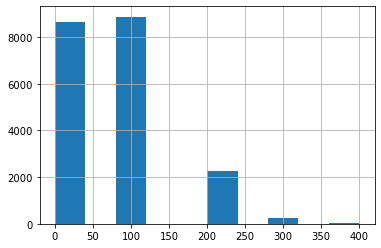

In [8]:
h["turns_cat"] = pd.cut( h["turns"], bins = [0, 50, 100, 150, 200, np.inf ], labels = [0, 100, 200, 300, 400])
h["turns_cat"].hist()

print( h["turns_cat"].describe())

In [9]:
split = StratifiedShuffleSplit( n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split( h, h["turns_cat"]): 
    strat_train_set = h.loc[train_index]
    strat_test_set = h.loc[test_index]
    
print( "\nThe training set has {:d} rows and {:d} columns.".format( strat_train_set.shape[0], strat_train_set.shape[1]))
print( "The test set has {:d} rows and {:d} columns.\n\n".format( strat_test_set.shape[0], strat_test_set.shape[1]))

# Look at the distributions: 

print( h["turns_cat"].value_counts() / len( h), "\n")   
print( strat_test_set["turns_cat"].value_counts() / len( strat_test_set), "\n")   
print( strat_train_set["turns_cat"].value_counts() / len( strat_train_set), "\n")


The training set has 16046 rows and 17 columns.
The test set has 4012 rows and 17 columns.


100    0.442267
0      0.431299
200    0.112025
300    0.013262
400    0.001147
Name: turns_cat, dtype: float64 

100    0.442173
0      0.431206
200    0.112164
300    0.013210
400    0.001246
Name: turns_cat, dtype: float64 

100    0.442291
0      0.431322
200    0.111991
300    0.013274
400    0.001122
Name: turns_cat, dtype: float64 



In [10]:
for set_ in ( strat_train_set, strat_test_set): 
    set_.drop( "turns_cat", axis = 1, inplace = True)

In [11]:
h = strat_train_set.copy()
h.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
11304,duhtxKw6,True,1.395857e+12,1.395858e+12,80,resign,black,15+5,dimch73,1200,great-mate-super-gre,1670,d4 d5 f3 Nc6 e4 Nf6 e5 Nd7 Nc3 Nb6 f4 Bf5 Nb5 ...,D00,Queen's Pawn Game,2
3526,PGeCWgTi,True,1.481990e+12,1.481990e+12,135,mate,white,15+0,kells,2145,gmanderson,2193,e4 e5 Nf3 Nc6 Bc4 Nf6 d3 Be7 O-O d6 c3 O-O a4 ...,C55,Italian Game: Two Knights Defense | Modern Bi...,7
9027,PQoFzEUf,True,1.430230e+12,1.430230e+12,18,resign,white,5+8,smisy,1638,johnny_kensington,1631,b4 e5 Bb2 Nc6 b5 Nd4 e3 Ne6 Bxe5 d6 Bb2 Bd7 f4...,A00,Polish Opening,1
9663,EtfaqCum,True,1.493738e+12,1.493738e+12,55,resign,white,7+3,aderbalco,1547,mashi,1366,e4 e5 Nf3 Nc6 Bc4 Bc5 d3 Nf6 Bg5 O-O Nc3 d6 Nd...,C50,Italian Game: Giuoco Pianissimo | Normal,8
3299,bcH5JWMu,True,1.504020e+12,1.504020e+12,143,draw,draw,7+2,mohammad1361,1768,uktamsaparov,1824,e4 d6 d4 e6 Nf3 c6 Nc3 Nd7 Be3 Ne7 Bd3 Ng6 e5 ...,C00,Rat Defense: Small Center Defense,4


<AxesSubplot:xlabel='black_rating', ylabel='turns'>

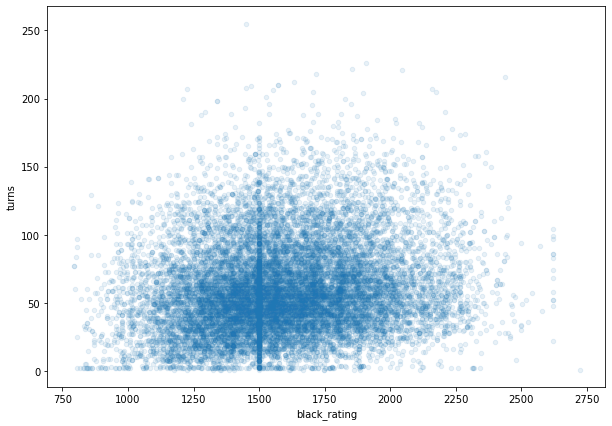

In [12]:
h.plot( kind = "scatter", x = "black_rating", y = "turns", alpha = 0.1, figsize = (10,7))

In [13]:
corr_matrix = h.corr()
corr_matrix.head( 10)

,rated,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
rated,1.000000,-0.001807,-0.001813,0.087238,0.008402,0.031781,-0.000737
created_at,-0.001807,1.000000,1.000000,0.081793,0.113079,0.130901,0.104756
last_move_at,-0.001813,1.000000,1.000000,0.081802,0.113081,0.130903,0.104758
turns,0.087238,0.081793,0.081802,1.000000,0.129478,0.162134,0.053261
white_rating,0.008402,0.113079,0.113081,0.129478,1.000000,0.630652,0.278059
black_rating,0.031781,0.130901,0.130903,0.162134,0.630652,1.000000,0.256336
opening_ply,-0.000737,0.104756,0.104758,0.053261,0.278059,0.256336,1.000000


In [14]:
print( corr_matrix["turns"].sort_values( ascending = False))

turns           1.000000
black_rating    0.162134
white_rating    0.129478
rated           0.087238
last_move_at    0.081802
created_at      0.081793
opening_ply     0.053261
Name: turns, dtype: float64


array([[<AxesSubplot:xlabel='turns', ylabel='turns'>,
        <AxesSubplot:xlabel='black_rating', ylabel='turns'>,
        <AxesSubplot:xlabel='white_rating', ylabel='turns'>,
        <AxesSubplot:xlabel='opening_ply', ylabel='turns'>],
       [<AxesSubplot:xlabel='turns', ylabel='black_rating'>,
        <AxesSubplot:xlabel='black_rating', ylabel='black_rating'>,
        <AxesSubplot:xlabel='white_rating', ylabel='black_rating'>,
        <AxesSubplot:xlabel='opening_ply', ylabel='black_rating'>],
       [<AxesSubplot:xlabel='turns', ylabel='white_rating'>,
        <AxesSubplot:xlabel='black_rating', ylabel='white_rating'>,
        <AxesSubplot:xlabel='white_rating', ylabel='white_rating'>,
        <AxesSubplot:xlabel='opening_ply', ylabel='white_rating'>],
       [<AxesSubplot:xlabel='turns', ylabel='opening_ply'>,
        <AxesSubplot:xlabel='black_rating', ylabel='opening_ply'>,
        <AxesSubplot:xlabel='white_rating', ylabel='opening_ply'>,
        <AxesSubplot:xlabel='opening_pl

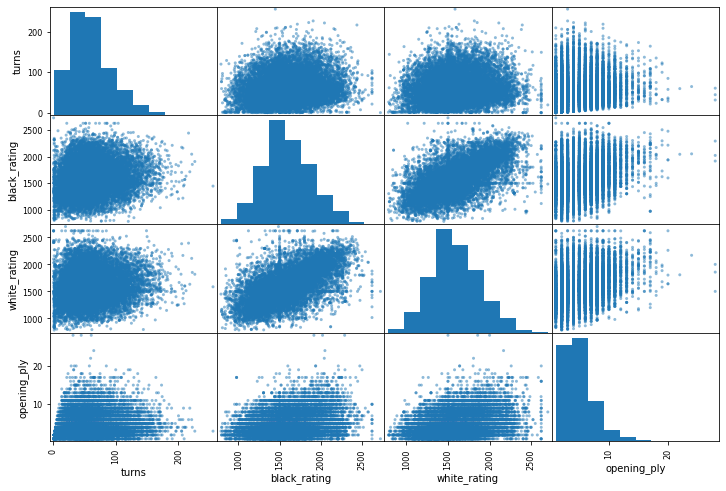

In [15]:
attributes=[ "turns", "black_rating", "white_rating", "opening_ply"]
scatter_matrix( h[attributes], figsize = (12,8))

In [16]:
op = h.opening_name

print(op)

print( "\nUnique Species in the iris dataset: ", op.unique())
print( "sp.unique() type = ", type(op.unique()))

11304                                    Queen's Pawn Game
3526     Italian Game: Two Knights Defense |  Modern Bi...
9027                                        Polish Opening
9663             Italian Game: Giuoco Pianissimo |  Normal
3299                     Rat Defense: Small Center Defense
                               ...                        
12341                      Queen's Pawn Game: Mason Attack
6561                 King's Pawn Game: Leonardis Variation
18395                            Ruy Lopez: Morphy Defense
12615    Sicilian Defense: Modern Variations |  Anti-Qx...
1169                          Ruy Lopez: Berlin Defense #2
Name: opening_name, Length: 16046, dtype: object

Unique Species in the iris dataset:  ["Queen's Pawn Game"
 "Italian Game: Two Knights Defense |  Modern Bishop's Opening"
 'Polish Opening' ... 'Semi-Slav Defense: Marshall Gambit |  Main Line'
 "King's Pawn Game: Pachman Wing Gambit"
 'Ruy Lopez: Central Countergambit']
sp.unique() type =  <class 'n

In [17]:
h.opening_name.describe()

count                16046
unique                1385
top       Sicilian Defense
freq                   290
Name: opening_name, dtype: object

In [18]:
print( type( h.opening_name.value_counts()))

# You can see that value_counts() returns a Series
# and that there are 50 of each Species. This is a very clean dataset! 

h.opening_name.value_counts()

<class 'pandas.core.series.Series'>


Sicilian Defense                                              290
Van't Kruijs Opening                                          286
Sicilian Defense: Bowdler Attack                              239
French Defense: Knight Variation                              221
Scandinavian Defense: Mieses-Kotroc Variation                 215
                                                             ... 
Modern Defense: Pseudo-Austrian Attack                          1
Italian Game: Two Knights Defense |  Traxler Counterattack      1
Benoni Defense: Cormorant Gambit                                1
Alekhine Defense: Scandinavian Variation |  Geschev Gambit      1
Ruy Lopez: Central Countergambit                                1
Name: opening_name, Length: 1385, dtype: int64

In [19]:
#figure(figsize = (200, 60), dpi = 160)
#h.opening_name.value_counts().plot( kind = "bar")

In [20]:
pd.crosstab( h.opening_name, h.winner).sort_values('black', ascending=False)

winner,black,draw,white
opening_name,,,
Sicilian Defense,167,12,111
Van't Kruijs Opening,166,13,107
Sicilian Defense: Bowdler Attack,130,11,98
Scandinavian Defense,106,5,74
French Defense: Knight Variation,95,12,114
...,...,...,...
English Opening: Agincourt Defense | Catalan Defense | Semi-Slav Defense,0,0,1
Queen's Gambit Refused: Albin Countergambit | Lasker Trap,0,0,2
Queen's Gambit Declined: Vienna Variation | Quiet Variation,0,0,3


In [21]:
pd.crosstab( h.opening_name, h.winner).sort_values('white', ascending=False)

winner,black,draw,white
opening_name,,,
Scandinavian Defense: Mieses-Kotroc Variation,71,4,140
French Defense: Knight Variation,95,12,114
Scotch Game,85,10,113
Sicilian Defense,167,12,111
Van't Kruijs Opening,166,13,107
...,...,...,...
King's Gambit Accepted | Abbazia Defense,1,0,0
Reti Opening: Anglo-Slav Variation | Bogoljubov Variation | III,1,0,0
Reti Opening: Advance Variation,4,0,0


In [22]:
pd.crosstab( h.opening_name, h.winner).sort_values('draw', ascending=False)

winner,black,draw,white
opening_name,,,
Queen's Pawn Game: Mason Attack,78,13,89
Van't Kruijs Opening,166,13,107
French Defense: Knight Variation,95,12,114
Sicilian Defense,167,12,111
Sicilian Defense: Bowdler Attack,130,11,98
...,...,...,...
King's Gambit Accepted | Cunningham Defense,1,0,1
King's Gambit Accepted | Bishop's Gambit | Maurian Defense,2,0,1
King's Gambit Accepted | Bishop's Gambit | Lopez Defense,0,0,2


In [23]:
#drop unneeded collumns.
h_dropped = h.drop(axis = 1, labels=['id','rated','white_id','black_id','created_at', 'last_move_at','opening_eco','opening_ply'])   #dont't need id, created_at, last_move_at, opening_+eco , opening_ply

trimmed = h_dropped[h_dropped.groupby('opening_name')['opening_name'].transform('count').ge(50)]       #Eliminating the underused openings.
print(trimmed)

       turns victory_status winner increment_code  white_rating  black_rating  \
11304     80         resign  black           15+5          1200          1670   
3526     135           mate  white           15+0          2145          2193   
9944      31         resign  white           30+0          1675          1722   
17205     16         resign  black           30+0          1389          1465   
9069      76         resign  black           10+0          1680          1673   
...      ...            ...    ...            ...           ...           ...   
18272     58         resign  black           10+0          1304          1646   
8446      29           mate  white           5+10          1500          1465   
12341     30         resign  black           15+2          1528          1500   
6561      27         resign  white          10+10          1581          1298   
1169      66         resign  black          25+25          2063          2183   

                           

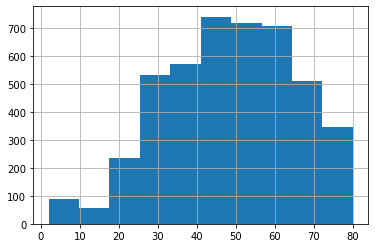

In [24]:
test = trimmed[trimmed.groupby('turns')['turns'].transform('count').ge(50)]  

pd.crosstab( test.turns, test.winner, normalize = 'index').sort_values('white', ascending=False)  #shows who is doing best

test["turns"].hist(bins=10)   #changes the scaling
plt.show()

In [25]:
trimmed["opening_name"].value_counts()  #most popular openings.

Sicilian Defense                                 290
Van't Kruijs Opening                             286
Sicilian Defense: Bowdler Attack                 239
French Defense: Knight Variation                 221
Scandinavian Defense: Mieses-Kotroc Variation    215
                                                ... 
Sicilian Defense: French Variation                55
Sicilian Defense: McDonnell Attack                53
Russian Game: Urusov Gambit                       52
Bird Opening: Dutch Variation                     51
Scandinavian Defense: Main Line                   50
Name: opening_name, Length: 61, dtype: int64

In [26]:
#shows best openings for white
pd.crosstab( trimmed.opening_name, trimmed.winner, normalize = 'index').sort_values('white', ascending=False) 

winner,black,draw,white
opening_name,,,
Queen's Gambit Refused: Marshall Defense,0.299065,0.018692,0.682243
Queen's Pawn,0.296296,0.027778,0.675926
King's Knight Opening,0.312500,0.015625,0.671875
Scandinavian Defense: Main Line,0.300000,0.040000,0.660000
Russian Game: Three Knights Game,0.304348,0.043478,0.652174
...,...,...,...
Van't Kruijs Opening,0.580420,0.045455,0.374126
Giuoco Piano,0.558140,0.069767,0.372093
Queen's Pawn Game,0.618182,0.027273,0.354545


In [27]:
#Best openings for black
pd.crosstab( trimmed.opening_name, trimmed.winner, normalize = 'index').sort_values('black', ascending=False)  

winner,black,draw,white
opening_name,,,
Sicilian Defense: Old Sicilian,0.625000,0.031250,0.343750
Mieses Opening,0.622951,0.000000,0.377049
Queen's Pawn Game,0.618182,0.027273,0.354545
Bird Opening,0.607143,0.053571,0.339286
Sicilian Defense: Alapin Variation,0.580645,0.016129,0.403226
...,...,...,...
Italian Game,0.304878,0.085366,0.609756
Russian Game: Three Knights Game,0.304348,0.043478,0.652174
Scandinavian Defense: Main Line,0.300000,0.040000,0.660000


In [28]:
small_trim = h_dropped[h_dropped.groupby('opening_name')['opening_name'].transform('count').ge(50)]


low_elo = small_trim[small_trim.white_rating <1500]
high_elo = small_trim[small_trim.white_rating > 1500]

print(low_elo)   #lost roughly 15000 rows.

pd.crosstab(low_elo.opening_name, low_elo.winner, normalize = 'index').sort_values('white', ascending=False)

       turns victory_status winner increment_code  white_rating  black_rating  \
11304     80         resign  black           15+5          1200          1670   
17205     16         resign  black           30+0          1389          1465   
6552      67         resign  white           15+0          1326          1141   
13756    111           mate  white            7+2          1288          1232   
9596      96         resign  black          20+15          1189          1366   
...      ...            ...    ...            ...           ...           ...   
11166     39         resign  black           25+0          1414          1104   
15658     18         resign  black           10+0          1317          1538   
5121      36         resign  black           3+15          1305          1396   
7979     109           mate  white           10+0          1434          1442   
18272     58         resign  black           10+0          1304          1646   

                           

winner,black,draw,white
opening_name,,,
Russian Game: Three Knights Game,0.242424,0.030303,0.727273
Queen's Pawn,0.303030,0.000000,0.696970
King's Knight Opening,0.390244,0.000000,0.609756
Queen's Gambit Refused: Marshall Defense,0.392857,0.000000,0.607143
Scandinavian Defense: Main Line,0.352941,0.058824,0.588235
...,...,...,...
Indian Game,0.676471,0.029412,0.294118
Sicilian Defense: French Variation,0.714286,0.000000,0.285714
Queen's Pawn Game,0.711864,0.033898,0.254237


In [29]:
pd.crosstab(high_elo.opening_name, high_elo.winner, normalize = 'index').sort_values('white', ascending=False)

winner,black,draw,white
opening_name,,,
Bishop's Opening,0.159091,0.045455,0.795455
King's Knight Opening,0.157895,0.052632,0.789474
King's Pawn Game: Damiano Defense,0.153846,0.076923,0.769231
Italian Game: Two Knights Defense | Modern Bishop's Opening,0.194444,0.055556,0.750000
Scandinavian Defense: Mieses-Kotroc Variation,0.241071,0.026786,0.732143
...,...,...,...
Scandinavian Defense,0.574468,0.021277,0.404255
Bird Opening: Dutch Variation,0.434783,0.173913,0.391304
Sicilian Defense: Bowdler Attack,0.592857,0.028571,0.378571


In [30]:
#1: Is matchmaking fixed? Does a higher rating correspond to a higher rated opponent?
#2: Does a higher elo rating lead to more complex openings?

from sklearn.model_selection import train_test_split

dropped = h.drop(axis = 1, labels=['id','rated','white_id','black_id','created_at', 'last_move_at','opening_eco', 'opening_name','increment_code','victory_status','moves','winner'])  
dropped.corr()   

,turns,white_rating,black_rating,opening_ply
turns,1.000000,0.129478,0.162134,0.053261
white_rating,0.129478,1.000000,0.630652,0.278059
black_rating,0.162134,0.630652,1.000000,0.256336
opening_ply,0.053261,0.278059,0.256336,1.000000


<AxesSubplot:xlabel='white_rating', ylabel='black_rating'>

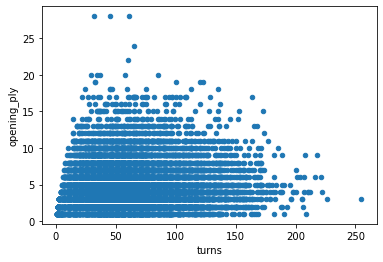

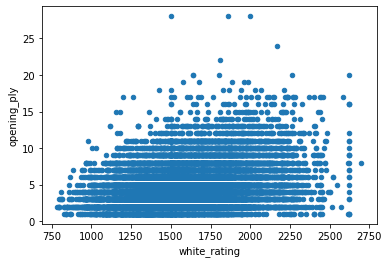

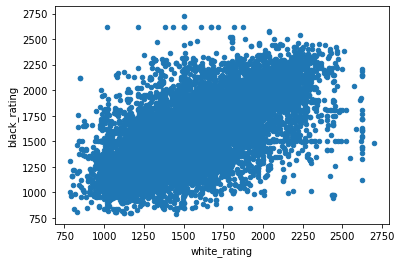

In [31]:
dropped.plot(kind = "scatter", x = "turns", y = "opening_ply")          
dropped.plot(kind = "scatter", x = "white_rating", y = "opening_ply")   
dropped.plot(kind = "scatter", x = "white_rating", y = "black_rating")   

In [32]:
from sklearn.linear_model import LinearRegression 

X_train, X_test, y_train, y_test = train_test_split( dropped.black_rating, dropped.white_rating, test_size = 0.3, random_state = 1)
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

1221.202721888936

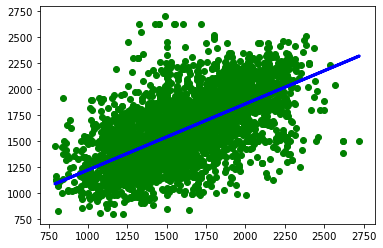

In [33]:
y_pred = lr.predict(X_test.values.reshape(-1, 1))
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.scatter(X_test,y_test,color = "green")               

lr.predict(np.array([[1000]]))[0]   #predicts white rating based on black rating

5.891125677836257

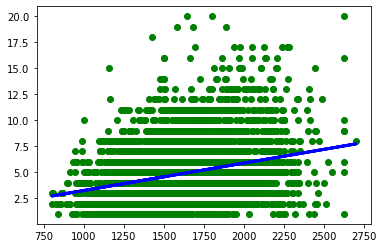

In [34]:
#Again but with white rating and opening ply.

X_train, X_test, y_train, y_test = train_test_split( dropped.white_rating, dropped.opening_ply, test_size = 0.3, random_state = 1)
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train)


y_pred = lr.predict(X_test.values.reshape(-1, 1))
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.scatter(X_test,y_test,color = "green")               

lr.predict(np.array([[2000]]))[0]   #predicts opening ply (length of opening) based on white's rating

66.80750879924435

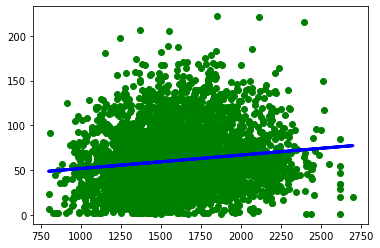

In [35]:
#One more, rating vs number of turns plated

X_train, X_test, y_train, y_test = train_test_split( dropped.white_rating, dropped.turns, test_size = 0.3, random_state = 1)
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train)


y_pred = lr.predict(X_test.values.reshape(-1, 1))
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.scatter(X_test,y_test,color = "green")               

lr.predict(np.array([[2000]]))[0]

In [36]:
import copy

nb = copy.deepcopy(trimmed)
nb = nb.drop(axis = 1, labels=['increment_code', 'moves', 'white_rating', 'black_rating', 'opening_name'])   #dont't need id, created_at, last_move_at, opening_+eco , opening_ply)
nb.head()

,turns,victory_status,winner
11304,80,resign,black
3526,135,mate,white
9944,31,resign,white
17205,16,resign,black
9069,76,resign,black


In [37]:
print(nb.winner.unique())

['black' 'white' 'draw']


In [38]:
le = preprocessing.LabelEncoder()
victory_encoded = le.fit_transform(nb.victory_status)
winner_encoded = le.fit_transform(nb.winner)

features = list(zip(nb.turns, victory_encoded, winner_encoded))

df = pd.DataFrame(features, columns = ['turns','victory', 'winner'])
#X = df.drop(axis = 1, labels=['victory'])
#y = np.array(df['victory'])

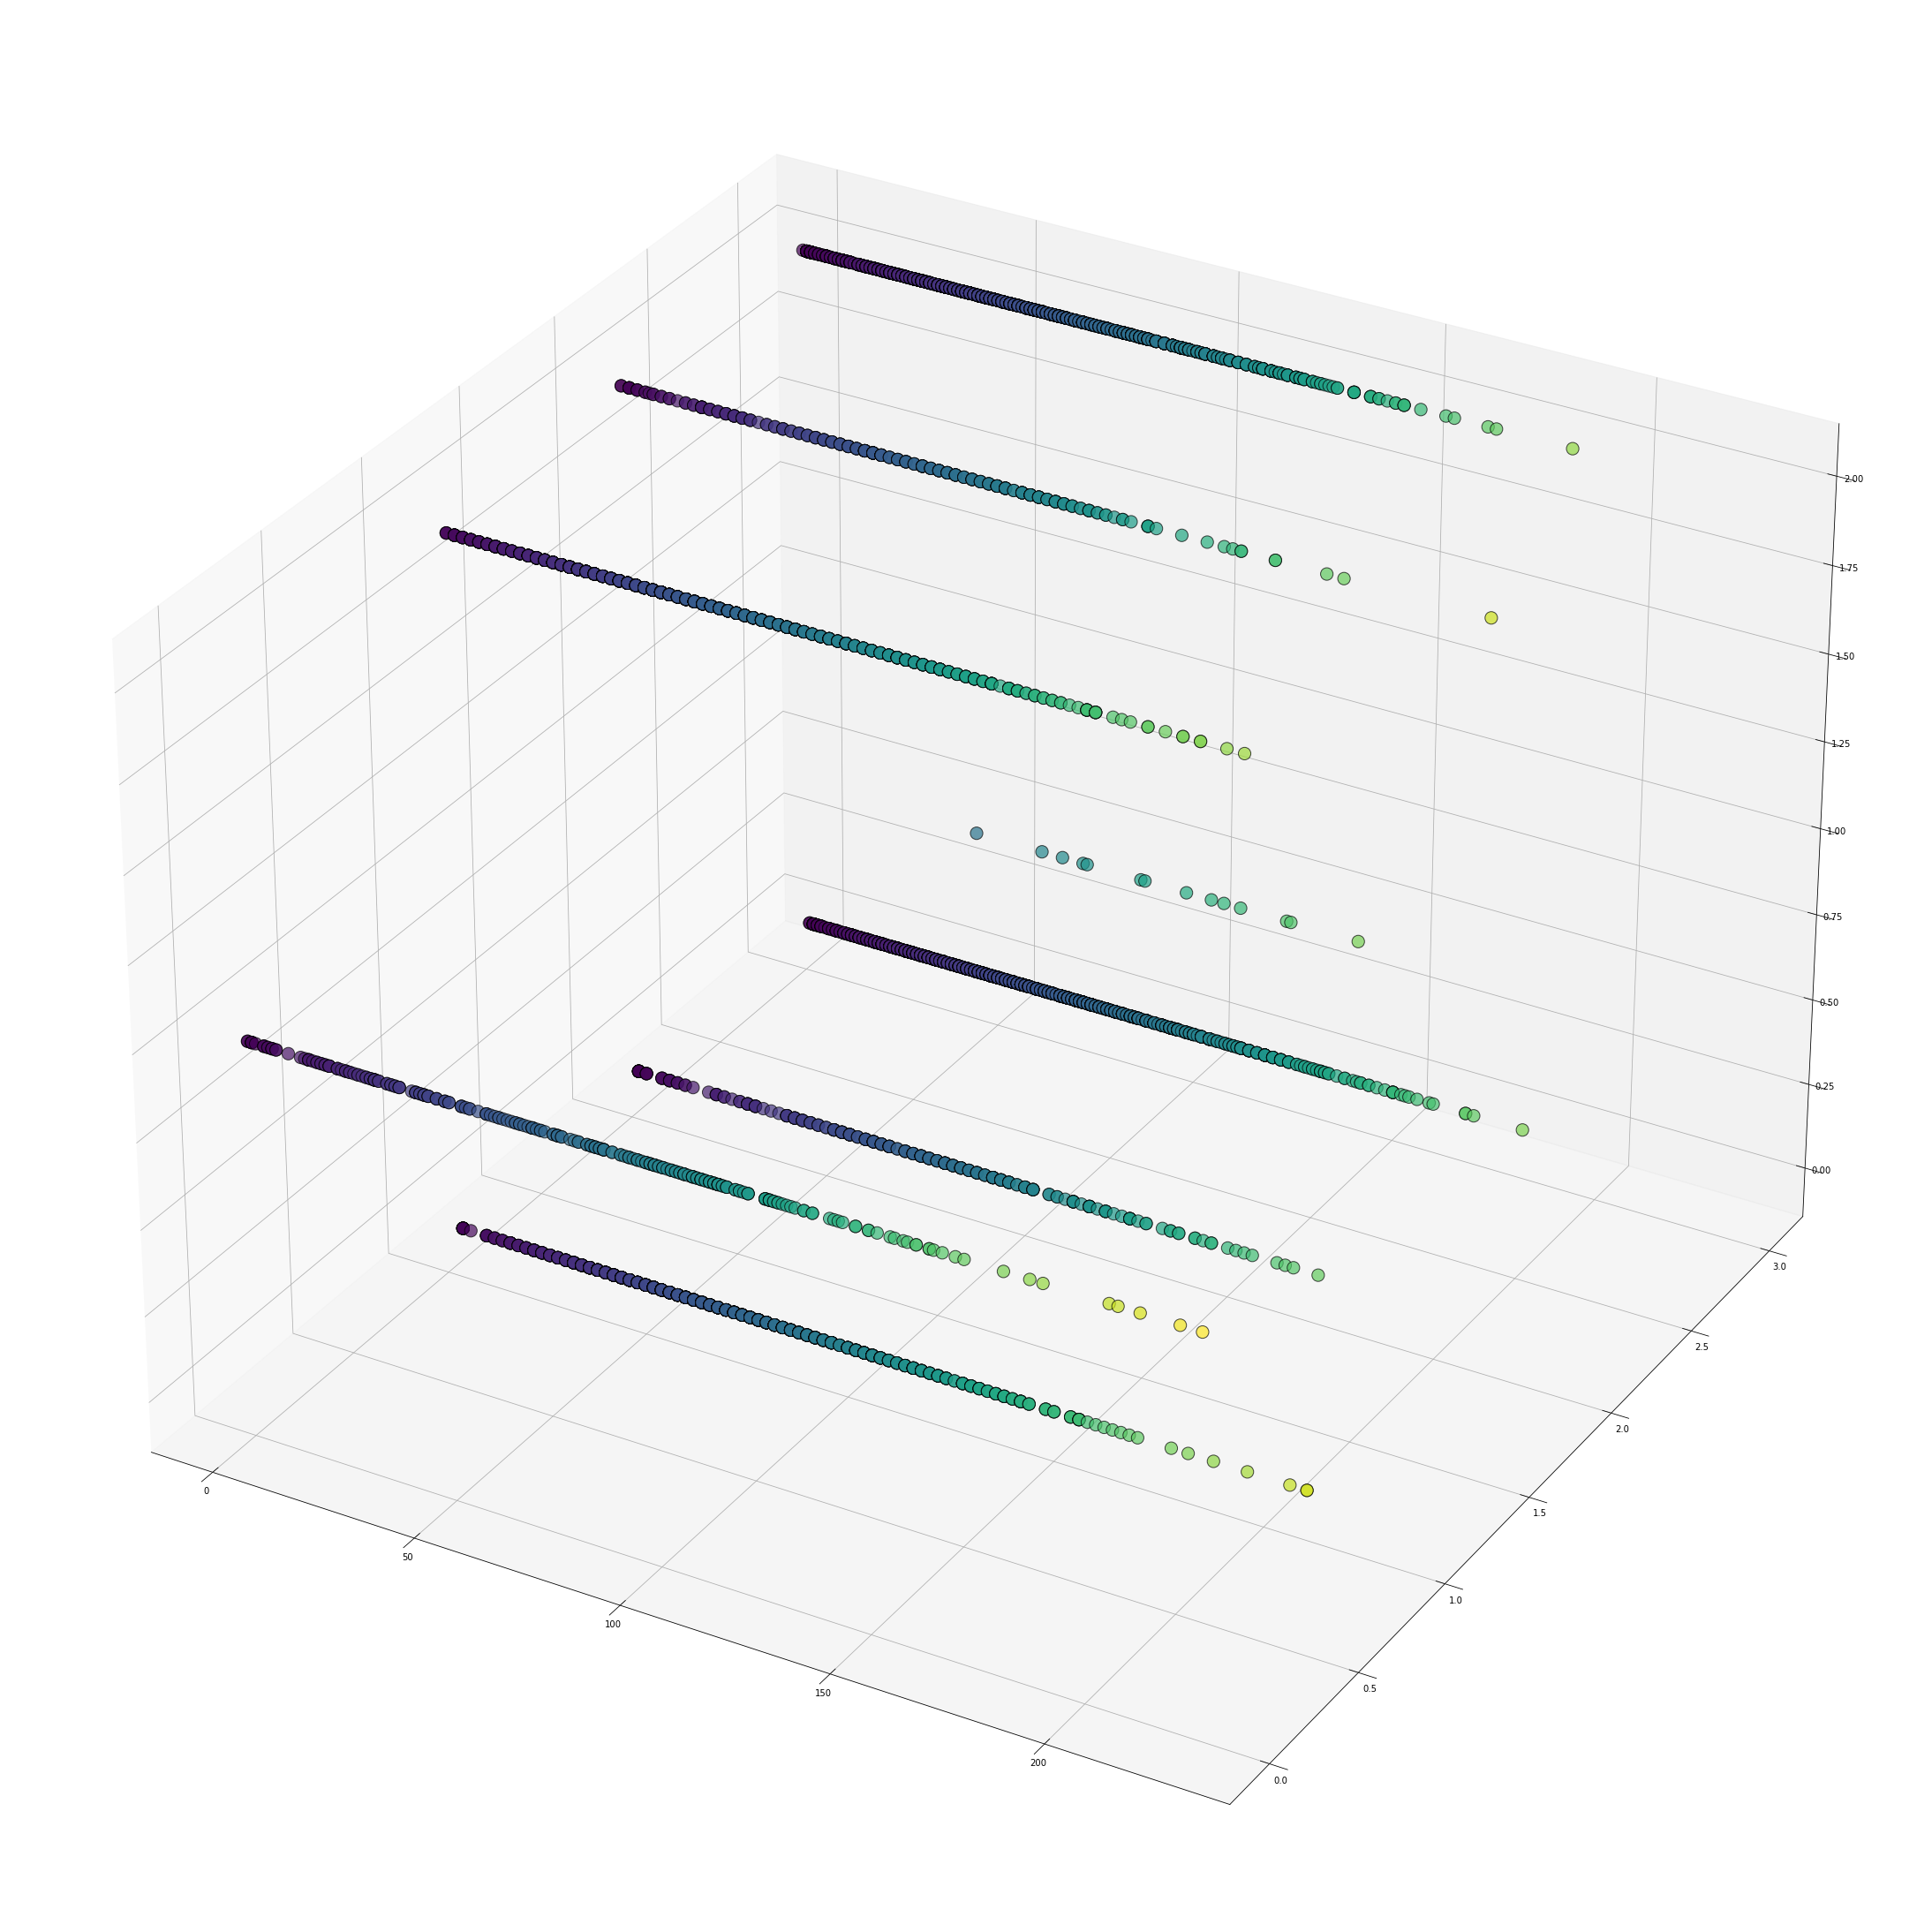

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = nb.turns
y = victory_encoded
z = winner_encoded

fig = plt.figure(figsize=(40, 40))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=nb.turns)
plt.show()

In [40]:
resign = small_trim[small_trim.victory_status == "resign"]
resign_high = resign[resign.white_rating > 1500]
resign_low = resign[resign.white_rating < 1500]

,turns,white_rating,black_rating
count,2052.000000,2052.000000,2052.000000
mean,58.066277,1738.990741,1679.213450
std,30.358391,188.261832,241.562632
min,1.000000,1501.000000,849.000000
25%,37.000000,1589.000000,1518.750000
50%,54.000000,1700.000000,1664.500000
75%,74.000000,1841.000000,1834.000000
max,189.000000,2621.000000,2516.000000


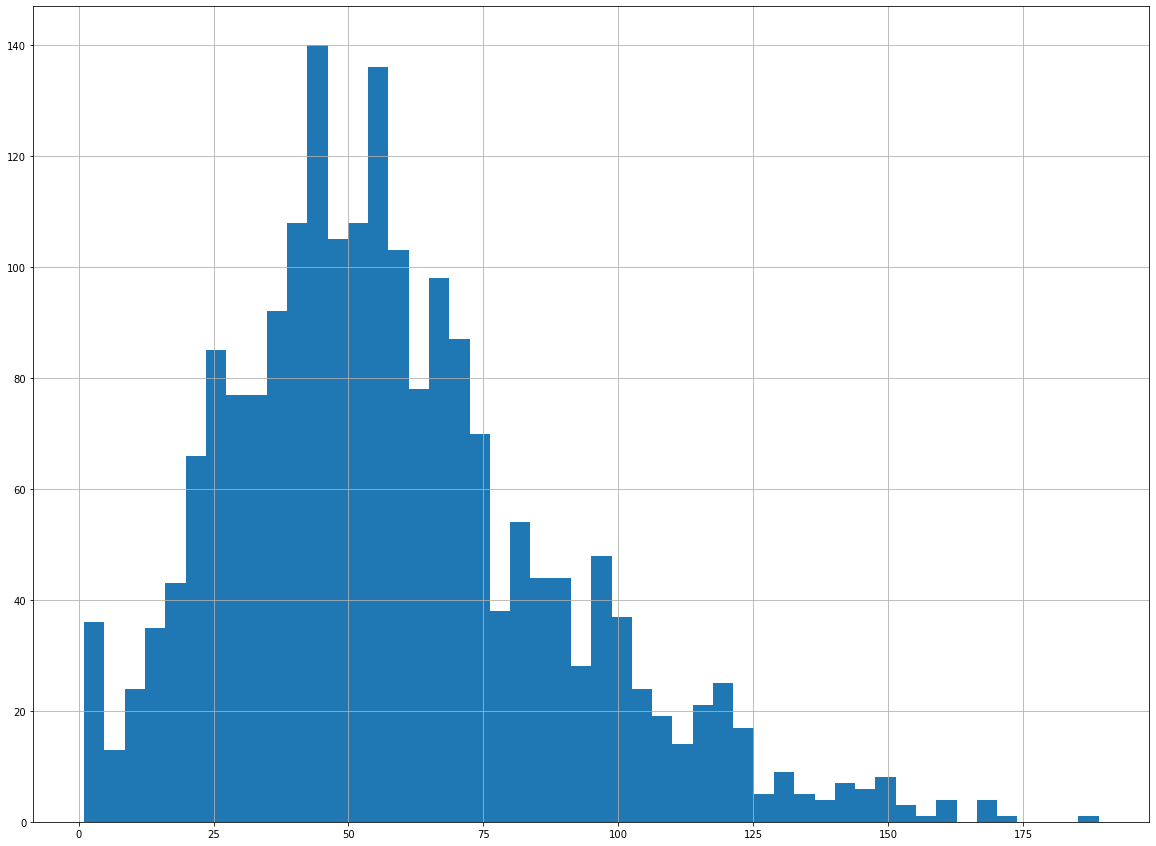

In [41]:
resign_high.turns.hist( bins = 50, figsize = (20,15))
resign_high.describe()

,turns,white_rating,black_rating
count,1471.000000,1471.000000,1471.000000
mean,46.454113,1311.237933,1386.065942
std,27.985208,141.491681,214.129906
min,1.000000,793.000000,789.000000
25%,26.000000,1233.000000,1252.000000
50%,44.000000,1342.000000,1385.000000
75%,62.000000,1422.000000,1500.000000
max,153.000000,1499.000000,2239.000000


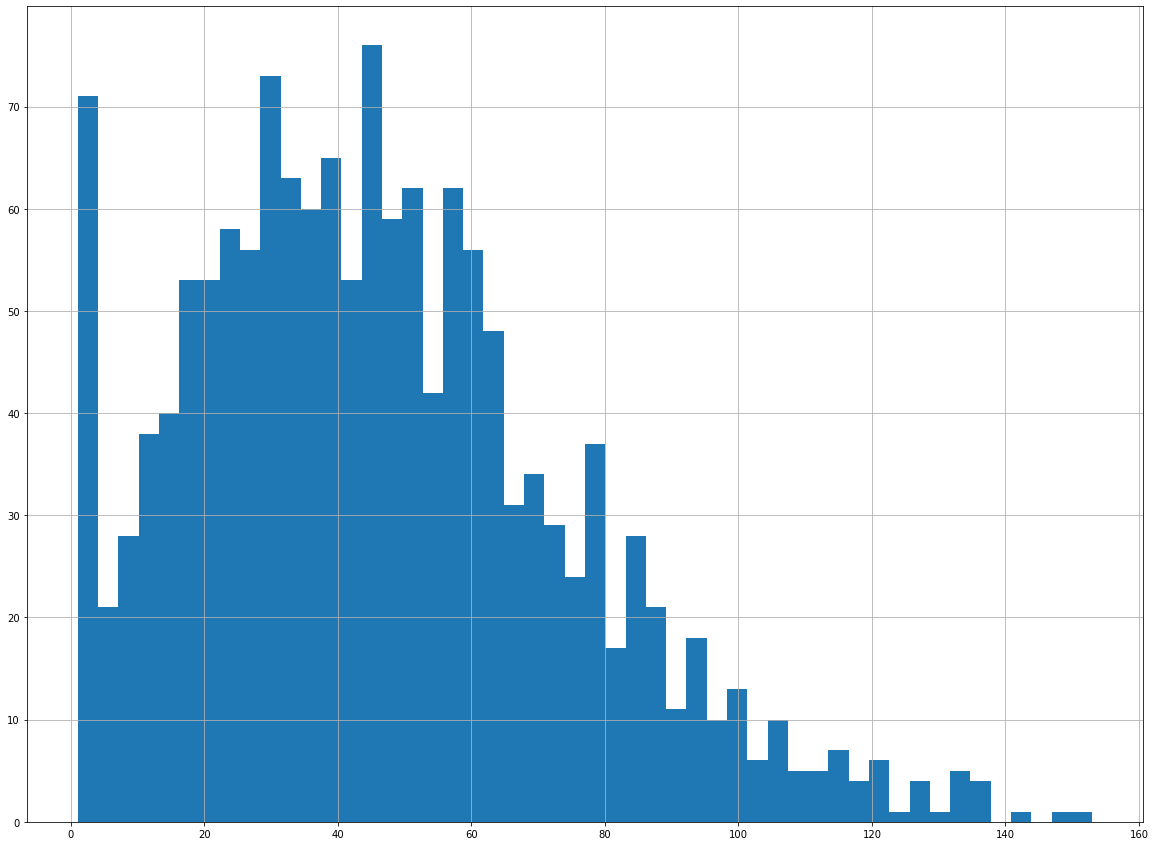

In [42]:
resign_low.turns.hist( bins = 50, figsize = (20,15))
resign_low.describe()

59.98407650939063

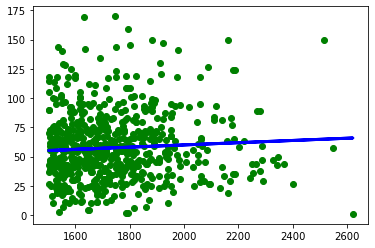

In [43]:
X_train, X_test, y_train, y_test = train_test_split( resign_high.white_rating, resign_high.turns, test_size = 0.3, random_state = 1)
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train)


y_pred = lr.predict(X_test.values.reshape(-1, 1))
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.scatter(X_test,y_test,color = "green")               

lr.predict(np.array([[2000]]))[0] #High elo vs turns (resign)

71.43809477272974

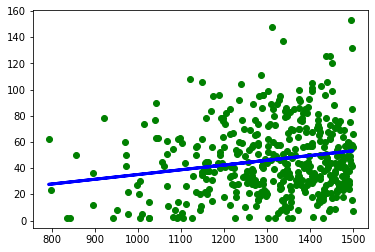

In [44]:
X_train, X_test, y_train, y_test = train_test_split( resign_low.white_rating, resign_low.turns, test_size = 0.3, random_state = 1)
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train)


y_pred = lr.predict(X_test.values.reshape(-1, 1))
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.scatter(X_test,y_test,color = "green")               
 
lr.predict(np.array([[2000]]))[0] #Low elo vs turns (resign)

63.32772125902353

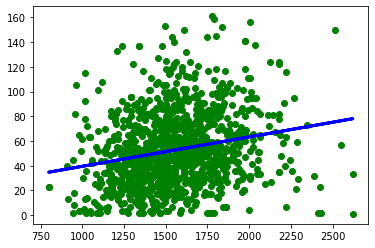

In [45]:
X_train, X_test, y_train, y_test = train_test_split( resign.white_rating, resign.turns, test_size = 0.3, random_state = 1)
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train)


y_pred = lr.predict(X_test.values.reshape(-1, 1))
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.scatter(X_test,y_test,color = "green")               

lr.predict(np.array([[2000]]))[0] #elo vs turns (resign)